# Part 3: Exploring `scoresFull.csv` with `Spark` Map-Reduce    

In this section, we'll be using the `scoresFull.csv` data set and using `Spark` map-reduce to find the mean and standard deviation for the quarter stats variables for each value of season. Then we'll graphically display the results.  

In [29]:
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import pyspark.pandas as ps
spark = SparkSession.builder.master('local[*]').getOrCreate()

import warnings
warnings.filterwarnings("ignore") 

Let's read scoresFull csv using pandas on spark!

In [30]:
psdf_data = ps.read_csv('scoresFull.csv', sep=",")

psdf_data.head(2)

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,AOT2,AFinal,homeTeam,HQ1,HQ2,HQ3,HQ4,HOT,HOT2,HFinal,stadium,startTime,toss,roof,surface,duration,attendance,weather,vegasLine,OU,AfirstDowns,AnetPassYds,AtotalYds,Aturnovers,AtotalPlays,HfirstDowns,HnetPassYds,HtotalYds,Hturnovers,HtotalPlays,OUvalue,OUresult,awayRushAtt,awayRushYds,awayRushTD,awayPassComp,awayPassAtt,awayPassYds,awayPassTD,awayPassInt,awayTimesSacked,awaySackYdsLost,awayFum,awayFumLost,awayNumPen,awayPenYds,away3rdConv,away3rdAtt,away4thConv,away4thAtt,awayTOP,homeRushAtt,homeRushYds,homeRushTD,homePassComp,homePassAtt,homePassYds,homePassTD,homePassInt,homeTimesSacked,homeSackYdsLost,homeFum,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,-1,16,New York Giants,3,3,0,7,-1,-1,13,Giants Stadium,8:38pm,Giants,outdoors,grass,170,"78,748","73 degrees relative humidity 49%, wind 7 mph",San Francisco 49ers -4.0,39.0 (under),13,166,279,1,51,21,318,361,3,70,39.0,(under),25,113,0,16,26,166,1,1,0,0,0,0,5,29,2,6,0,0,27.53,22,43,1,28,45,342,0,3,3,24,0,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,-1,23,Chicago Bears,7,3,3,14,-1,-1,27,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay,201,"63,226","85 degrees relative humidity 0%, wind 3 mph",Chicago Bears -4.5,41.0 (over),19,228,368,3,62,20,288,368,2,60,41.0,(over),33,140,1,16,28,234,1,2,1,6,2,1,8,52,3,8,0,0,31.52,26,80,1,20,33,297,2,1,1,9,1,1,4,33,2,6,0,0,28.48,4,4.5


Using pandas-on-Spark to find the mean and standard deviation for the AQ1, AQ2, AQ3, AQ4, AFinal, HQ1, HQ2, HQ3, HQ4, and HFinal variables

In [31]:
psdf_mean = psdf_data.agg({'AQ1': ['mean', 'std'], 'AQ2': ['mean', 'std'], 'AQ3': ['mean', 'std'], \
                           'AQ4': ['mean', 'std'], 'AFinal': ['mean', 'std'], 'HQ1': ['mean', 'std'], \
                           'HQ2': ['mean', 'std'], 'HQ3': ['mean', 'std'], 'HQ4': ['mean', 'std'], \
                           'HFinal': ['mean', 'std'] \
                          })
psdf_mean

,AQ1,AQ2,AQ3,AQ4,AFinal,HQ1,HQ2,HQ3,HQ4,HFinal
std,4.490700,5.221593,4.632717,5.278775,10.195586,4.726903,5.702788,4.755145,5.417310,10.405952
mean,3.924806,6.241429,4.386920,5.890233,20.557188,4.828868,7.105157,4.791126,6.322962,23.174013


Let's repeat above task to get mean and std for the given variables for each season.

In [36]:
psdf_season_mean_std = psdf_data.groupby('season').agg({'AQ1': ['mean', 'std'], 'AQ2': ['mean', 'std'], 'AQ3': ['mean', 'std'], \
                           'AQ4': ['mean', 'std'], 'AFinal': ['mean', 'std'], 'HQ1': ['mean', 'std'], \
                           'HQ2': ['mean', 'std'], 'HQ3': ['mean', 'std'], 'HQ4': ['mean', 'std'], \
                           'HFinal': ['mean', 'std'] \
                          }).sort_index()
psdf_season_mean_std

AQ1                 AQ2                 AQ3                 AQ4               AFinal                  HQ1                 HQ2                 HQ3                 HQ4               HFinal           
            mean       std      mean       std      mean       std      mean       std       mean        std      mean       std      mean       std      mean       std      mean       std       mean        std
season                                                                                                                                                                                                            
2002    4.037453  4.470297  6.022472  5.167810  4.449438  4.639673  5.928839  5.282133  20.640449  10.296996  4.307116  4.549980  7.411985  5.923282  4.715356  4.716938  6.426966  5.384231  23.018727  10.295065
2003    3.558052  4.320719  6.093633  5.440954  3.913858  4.396264  5.355805  5.148618  19.112360  10.211049  5.026217  4.681919  6.625468  5.367875  4.561798  4.719871  6.295880  5.321832  22.677903  10.105887
2004    3.913858  4.556669  6.265918  5.094638  4.153558  4.631822  5.797753  5.400181  20.239700  10.162710  4.943820  4.733562  7.071161  5.587193  4.250936  4.675238  6.561798  5.155379  22.906367  10.441145
2005    3.887640  4.522554  5.543071  4.947945  4.029963  4.476236  5.191011  4.753811  18.786517   9.926578  4.393258  4.586556  7.426966  5.704940  4.677903  4.489042  5.737828  5.173548  22.314607   9.772905
2006    3.629213  3.986015  6.179775  5.157435  4.303371  4.531605  6.063670  5.539984  20.254682  10.269065  4.606742  4.999138  6.041199  5.199966  4.565543  4.931715  5.932584  5.262574  21.258427   9.876525
2007    3.696629  4.324448  6.220974  5.050111  4.337079  4.507997  5.872659  5.283565  20.228464  10.572177  5.026217  4.824287  7.074906  5.780607  4.913858  4.455721  6.018727  6.010300  23.157303  10.500518
2008    3.801498  4.203686  6.498127  5.337747  4.074906  4.242863  6.423221  5.498864  20.842697  10.279806  5.179775  4.857120  7.205993  5.825685  4.595506  4.700950  6.044944  5.171299  23.183521  10.414349
2009    3.868914  4.748728  6.202247  5.285488  4.299625  4.714412  5.943820  5.571192  20.382022  10.743600  4.737828  4.731771  7.790262  6.208245  4.228464  4.723587  5.887640  5.176810  22.779026  10.788110
2010    3.973783  4.727466  6.865169  5.396722  4.629213  4.784959  5.704120  4.953022  21.318352  10.278809  4.576779  4.485221  6.771536  5.476904  4.868914  4.753476  6.681648  5.626849  23.000000  10.230060
2011    3.857678  4.455541  5.981273  5.281869  4.584270  4.628635  5.996255  5.120722  20.509363   9.647690  5.022472  4.859633  7.333333  5.673886  5.033708  4.962527  6.479401  5.262521  23.981273  10.527962
2012    4.468165  4.754293  6.273408  5.452819  4.509363  4.627771  6.235955  5.338234  21.655431  10.367006  4.928839  4.504654  7.003745  5.379925  5.217228  4.542779  6.823970  5.675672  24.119850  10.559919
2013    4.044944  4.345709  6.670412  5.441761  5.011236  4.904719  6.183521  5.417879  21.977528   9.680199  5.112360  4.791373  7.445693  5.726854  5.258427  4.846194  6.932584  5.757240  24.891386  10.582623
2014    4.284644  4.893746  6.322097  4.769223  4.734082  5.059837  5.876404  5.243299  21.295880   9.780606  4.913858  4.821248  7.164794  6.113817  5.397004  5.184534  6.374532  5.329217  23.973783  10.870879

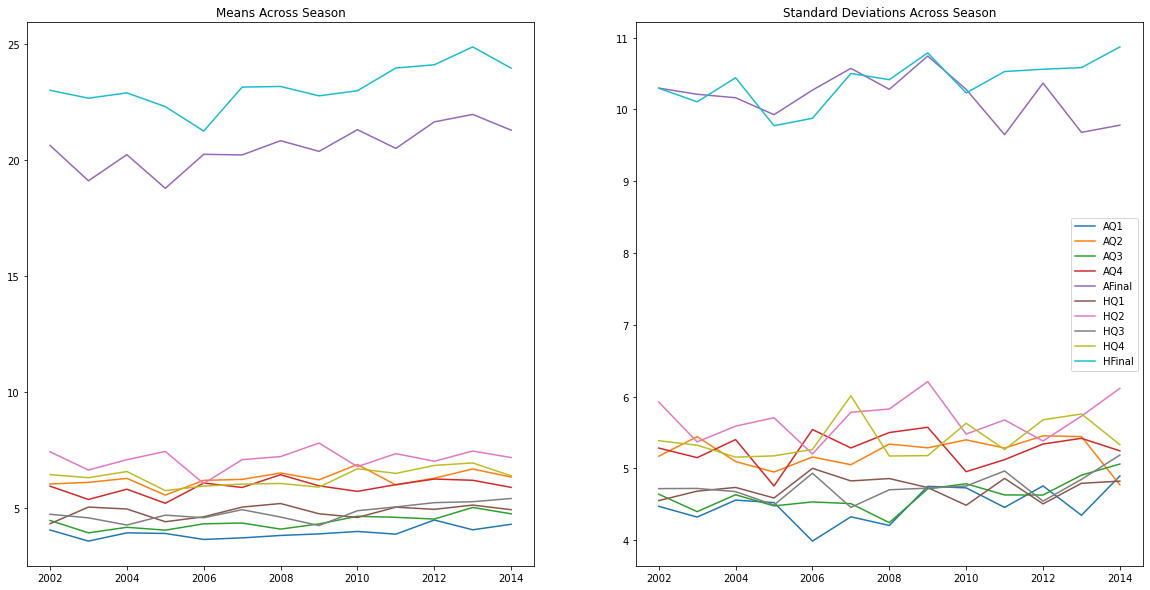

In [84]:
# Initialise the subplot function using number of rows and columns

figure, axis = plt.subplots(1, 2,figsize=(20, 10))

axis[0].plot(psdf_season_mean_std[('AQ1', 'mean')], label = "AQ1")
axis[0].plot(psdf_season_mean_std[('AQ2', 'mean')], label = "AQ2")
axis[0].plot(psdf_season_mean_std[('AQ3', 'mean')], label = "AQ3")
axis[0].plot(psdf_season_mean_std[('AQ4', 'mean')], label = "AQ4")
axis[0].plot(psdf_season_mean_std[('AFinal', 'mean')], label = "AFinal")
axis[0].plot(psdf_season_mean_std[('HQ1', 'mean')], label = "HQ1")
axis[0].plot(psdf_season_mean_std[('HQ2', 'mean')], label = "HQ2")
axis[0].plot(psdf_season_mean_std[('HQ3', 'mean')], label = "HQ3")
axis[0].plot(psdf_season_mean_std[('HQ4', 'mean')], label = "HQ4")
axis[0].plot(psdf_season_mean_std[('HFinal', 'mean')], label = "HFinal")

axis[0].set_title("Means Across Season")

axis[1].plot(psdf_season_mean_std[('AQ1', 'std')], label = "AQ1")
axis[1].plot(psdf_season_mean_std[('AQ2', 'std')], label = "AQ2")
axis[1].plot(psdf_season_mean_std[('AQ3', 'std')], label = "AQ3")
axis[1].plot(psdf_season_mean_std[('AQ4', 'std')], label = "AQ4")
axis[1].plot(psdf_season_mean_std[('AFinal', 'std')], label = "AFinal")
axis[1].plot(psdf_season_mean_std[('HQ1', 'std')], label = "HQ1")
axis[1].plot(psdf_season_mean_std[('HQ2', 'std')], label = "HQ2")
axis[1].plot(psdf_season_mean_std[('HQ3', 'std')], label = "HQ3")
axis[1].plot(psdf_season_mean_std[('HQ4', 'std')], label = "HQ4")
axis[1].plot(psdf_season_mean_std[('HFinal', 'std')], label = "HFinal")

axis[1].set_title("Standard Deviations Across Season")

plt.legend()

In [33]:
dfs=spark.read.load("scoresFull.csv",format='csv',sep=",",inferSchema='true',header='true')
dfs.take(2)

[Row(week='1', date='5-Sep', day='Thu', season=2002, awayTeam='San Francisco 49ers', AQ1=3, AQ2=0, AQ3=7, AQ4=6, AOT=-1, AOT2=-1, AFinal=16, homeTeam='New York Giants', HQ1=3, HQ2=3, HQ3=0, HQ4=7, HOT=-1, HOT2=-1, HFinal=13, stadium='Giants Stadium ', startTime='8:38pm', toss='Giants', roof='outdoors', surface='grass', duration=170, attendance='78,748', weather='73 degrees relative humidity 49%, wind 7 mph', vegasLine='San Francisco 49ers -4.0', OU='39.0 (under)', AfirstDowns=13, AnetPassYds=166, AtotalYds=279, Aturnovers=1, AtotalPlays=51, HfirstDowns=21, HnetPassYds=318, HtotalYds=361, Hturnovers=3, HtotalPlays=70, OUvalue=39.0, OUresult='(under)', awayRushAtt=25, awayRushYds=113, awayRushTD=0, awayPassComp=16, awayPassAtt=26, awayPassYds=166, awayPassTD=1, awayPassInt=1, awayTimesSacked=0, awaySackYdsLost=0, awayFum=0, awayFumLost=0, awayNumPen=5, awayPenYds=29, away3rdConv=2, away3rdAtt=6, away4thConv=0, away4thAtt=0, awayTOP=27.53, homeRushAtt=22, homeRushYds=43, homeRushTD=1, hom

In [5]:
#Split the data
list_rdd=[]
df=pd.read_csv("scoresFull.csv")
for i in range(2002,2015):
    list_rdd.append(df[df["season"]==i])
Season_Rdd=spark.sparkContext.parallelize(list_rdd)
type(Season_Rdd)

pyspark.rdd.RDD

In [6]:
#Create def for mean and variance computing
def mean_std(var_l):
    mean_dic={}
    std_dic={}
    for i in var_l:
        sum_total=Season_Rdd.map(lambda x: x[i].sum()).map(lambda x: (i,x)).reduceByKey(lambda x,y: x+y).collect()[0][1]
        count_total=Season_Rdd.map(lambda x: x[i].count()).map(lambda x: (i,x)).reduceByKey(lambda x,y: x+y).collect()[0][1]
        sum_sqt_total=Season_Rdd.flatMap(lambda x: x[i]).map(lambda x: (i,x**2)).reduceByKey(lambda x,y: x+y).collect()[0][1]
        mean_dic[i]=sum_total/count_total          
        std_dic[i]= ((sum_sqt_total-count_total*(sum_total/count_total)**2)/(count_total-1))**0.5
    return [mean_dic,std_dic]

In [7]:
#Apply the list of variables to find mean and std
Report_Q=["AQ1", "HQ1","AQ2", "HQ2","AQ3", "HQ3","AQ4", "HQ4","AFinal","HFinal"]
Report_list=mean_std(Report_Q)
print("\nMean is:\n",Report_list[0],"\nSTD is:\n",Report_list[1])


Mean is:
 {'AQ1': 3.9248055315471047, 'HQ1': 4.828867761452031, 'AQ2': 6.241428983002017, 'HQ2': 7.105157015269374, 'AQ3': 4.38692019590896, 'HQ3': 4.791126476519735, 'AQ4': 5.890233362143475, 'HQ4': 6.322961682512244, 'AFinal': 20.55718813022184, 'HFinal': 23.17401325266494} 
STD is:
 {'AQ1': 4.490700421089053, 'HQ1': 4.726903424009663, 'AQ2': 5.221593452957312, 'HQ2': 5.702788076137263, 'AQ3': 4.6327168250024915, 'HQ3': 4.755144845943296, 'AQ4': 5.278775371882614, 'HQ4': 5.417310283450347, 'AFinal': 10.195585841440774, 'HFinal': 10.40595174402417}


Using the information above, we can produce a line graph displaying the means for each quarter variable across the seasons.

In [8]:
mean=dfs[['season','AQ1','AQ2','AQ3','AQ4','HQ1','HQ2','HQ3','HQ4']].groupby('season').avg().toPandas().sort_values(by = ["season"])

Text(0.5, 1.0, 'Means for Quarter Variables Across Season')

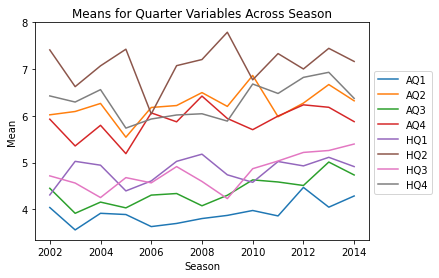

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 57552)


In [9]:
plt.plot(mean.season, mean["avg(AQ1)"], label = "AQ1")
plt.plot(mean.season, mean["avg(AQ2)"], label = "AQ2")
plt.plot(mean.season, mean["avg(AQ3)"], label = "AQ3")
plt.plot(mean.season, mean["avg(AQ4)"], label = "AQ4")
plt.plot(mean.season, mean["avg(HQ1)"], label = "HQ1")
plt.plot(mean.season, mean["avg(HQ2)"], label = "HQ2")
plt.plot(mean.season, mean["avg(HQ3)"], label = "HQ3")
plt.plot(mean.season, mean["avg(HQ4)"], label = "HQ4")

plt.legend(bbox_to_anchor = (1, 0.8))
plt.xlabel("Season")
plt.ylabel("Mean")
plt.title("Means for Quarter Variables Across Season")

The lines in the graph above appear to trend slightly upward in general, and are divided into two groups. The group with the highest mean values includes **HQ2**, **AQ2**, **HQ4**, and **AQ4**. The second group has generally lower means and includes **HQ1**, **HQ3**, **AQ3**, and **AQ1**. It appears that the means for Q2 and Q4 were higher than the means for Q1 and Q3.  